Importing the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Loading the Dataset for analysis

In [ ]:
df = pd.read_csv('breastcancer.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Data Understanding and Data Cleaning

In [ ]:
print(df.shape)

(569, 33)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
remove = ["Unnamed: 32","id"]
df = df.drop(columns=remove)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<ipython-input-28-c5b574dd8493>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax,color = "Red")


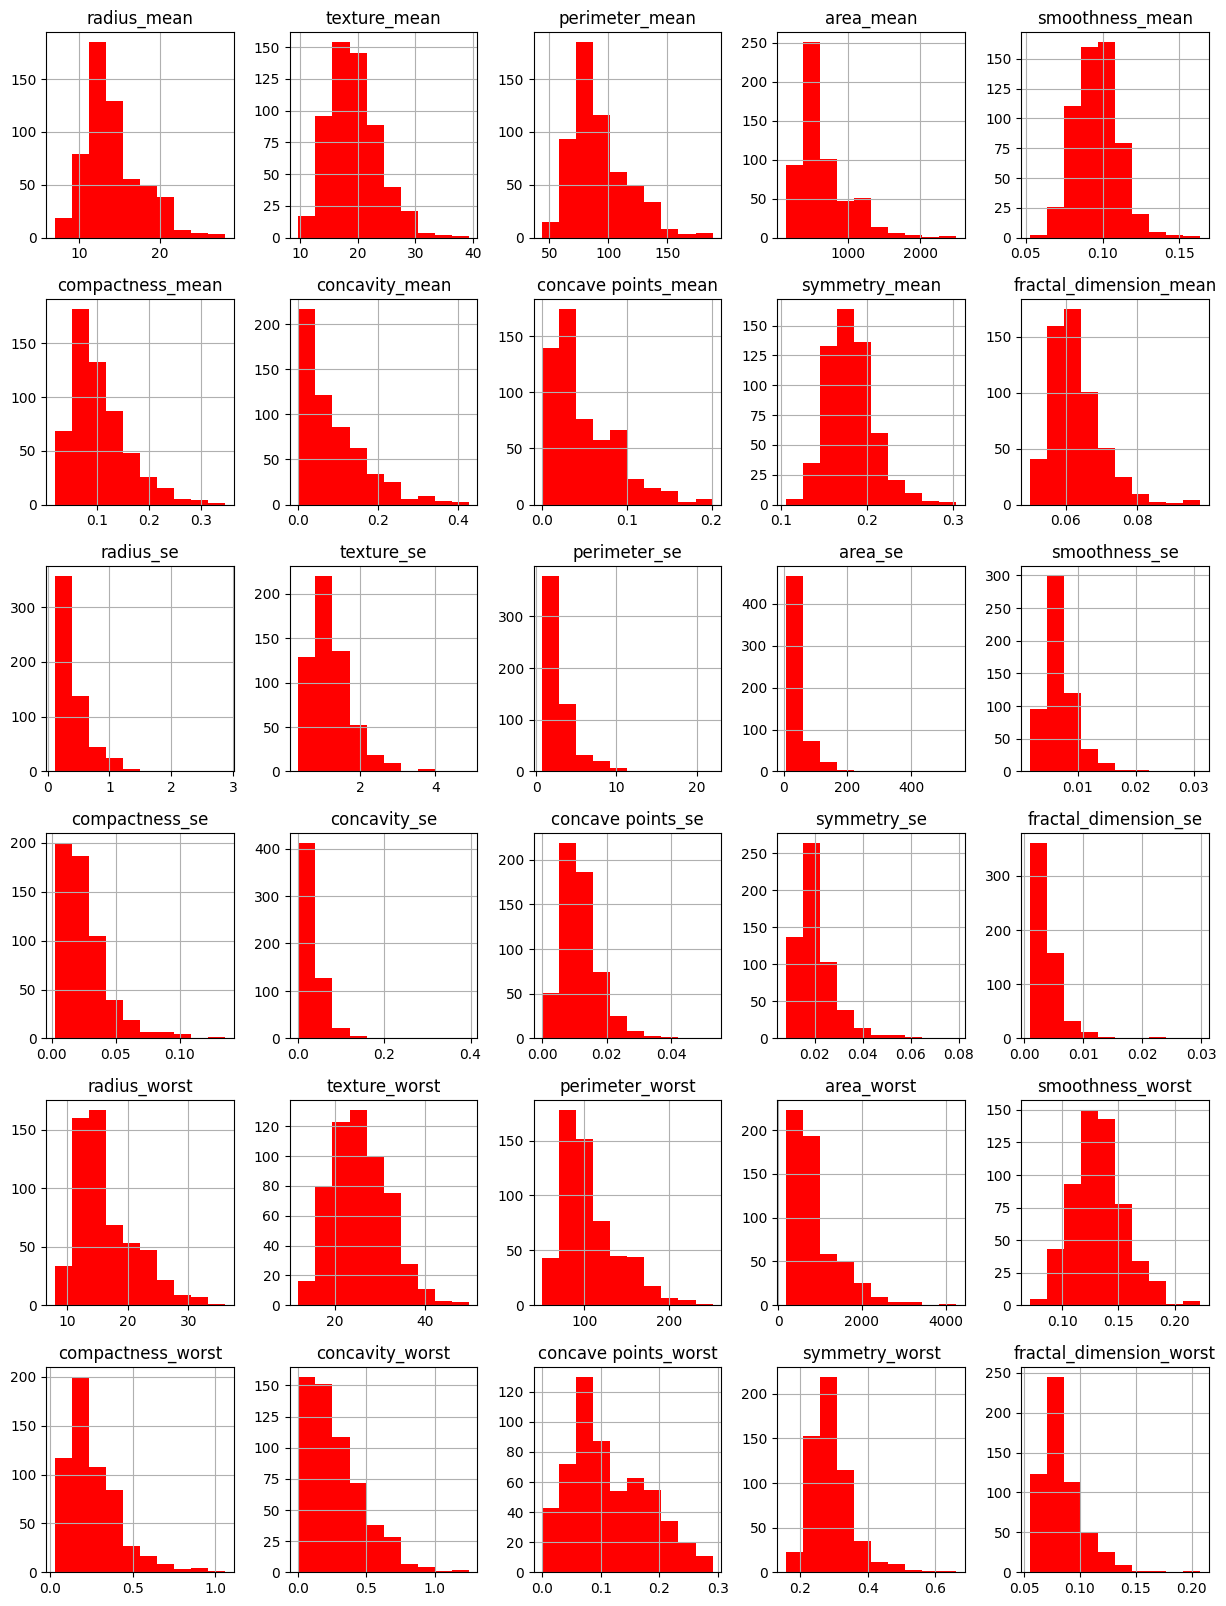

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax,color = "Red")
plt.show()

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
Particial_Null = df[df.isnull().any(axis=1)]
print(Particial_Null)

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


In [ ]:
for column in df: # To inspect the unique values present in each column.
  unique= df[column].unique()
  print("Unique values of the column"+column+":")
  print(unique)
  print('\n')

Unique values of the columndiagnosis:
['M' 'B']


Unique values of the columnradius_mean:
[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.4

In [ ]:
numericdfdata = df.select_dtypes(include=['number'])
correlation_matrix = numericdfdata.corr()
print(correlation_matrix)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

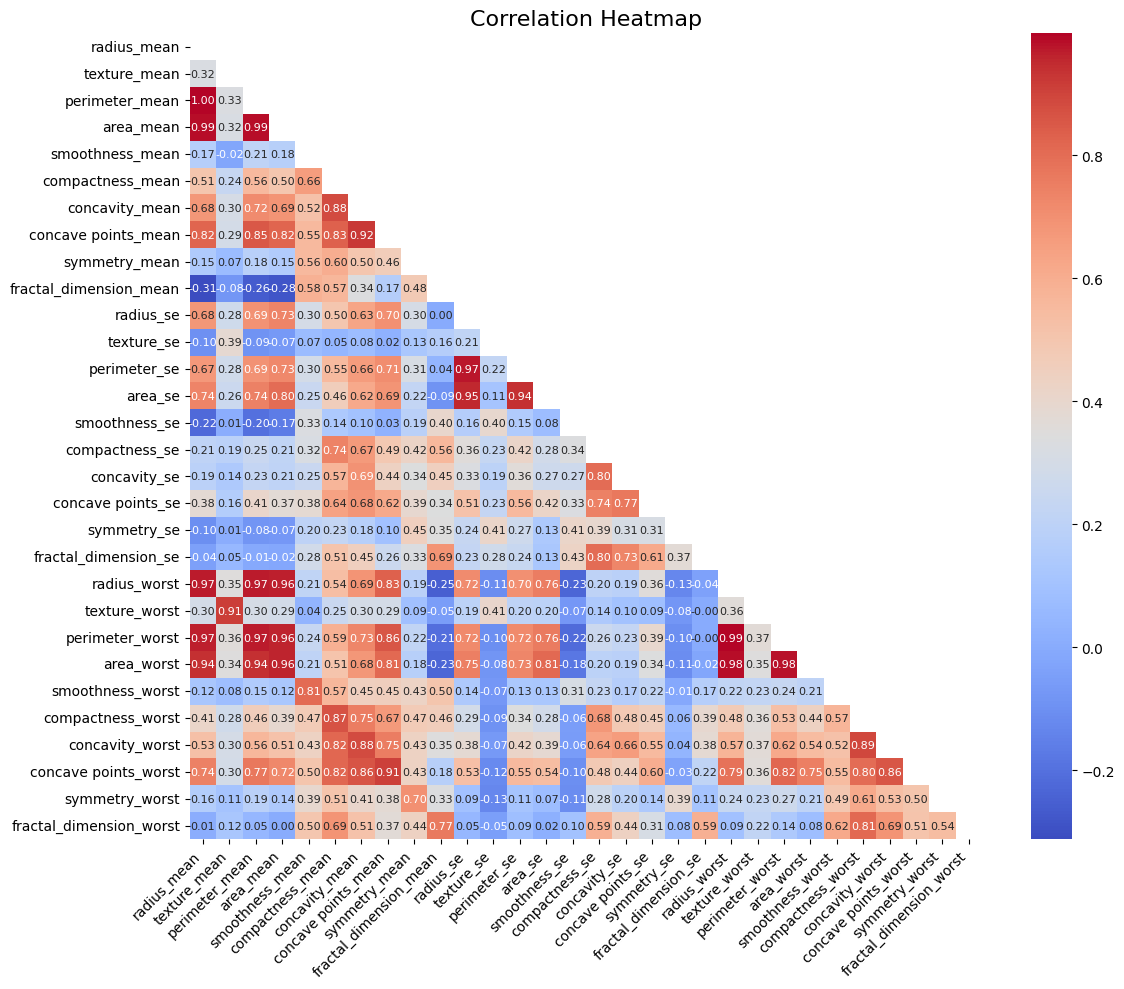

In [ ]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Label Encoding


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Feature Scaling/Normalization

In [ ]:
#Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('diagnosis', axis=1))

In [ ]:
x = df.drop(columns=['diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
Scaler  = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [ ]:
df['diagnosis'] = df['diagnosis'].astype(int)
print(df.head)

<bound method NDFrame.head of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840      

In [ ]:
df['diagnosis'].unique()

array([0, 1])

Data Splitting

In [ ]:
y=df['diagnosis']

In [ ]:
x=df.drop(columns=['diagnosis'])

In [ ]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Data Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
y_train

,diagnosis
68,1
181,0
63,1
248,1
60,1
...,...
71,1
106,1
270,1
435,0


In [ ]:
x_train.shape,y_train.shape

((455, 30), (455,))

In [ ]:
x_test.shape,y_test.shape

((114, 30), (114,))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

Model Evaluation
KNN Algorithm:

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print(len(x_test))
print(x_test[[20]].shape)

114
(1, 30)


In [ ]:
predicted_class = knn.predict(x_test[[20]])
predicted_class

array([1])

In [ ]:
y_prediction_knn = knn.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix and metrics computation
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_knn).ravel()
print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")


# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_prediction_knn)
precision_knn = precision_score(y_test, y_prediction_knn)
recall_knn = recall_score(y_test, y_prediction_knn)
f1_knn = f1_score(y_test, y_prediction_knn)
roc_auc_knn = roc_auc_score(y_test, y_prediction_knn)

# Metrics
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-Score: {f1_knn:.3f}")
print(f"ROC-AUC: {roc_auc_knn:.3f}")

Confusion Matrix: TN=40, FP=3, FN=3, TP=68
Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1-Score: 0.958
ROC-AUC: 0.944


BernoulliNB Method

In [ ]:
bernoulli = BernoulliNB()
bernoulli.fit(x_train, y_train)

BernoulliNB()

In [ ]:
y_prediction_bernoulli = bernoulli.predict(x_test)

In [ ]:
#Bernoulli Naive Bayes Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_bernoulli).ravel()
print(f"Confusion Matrix for Bernoulli Naive Bayes: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Bernoulli Naive Bayes metrics
accuracy_bernoulli = accuracy_score(y_test, y_prediction_bernoulli)
precision_bernoulli = precision_score(y_test, y_prediction_bernoulli)
recall_bernoulli = recall_score(y_test, y_prediction_bernoulli)
f1_bernoulli = f1_score(y_test, y_prediction_bernoulli)

# For ROC-AUC
roc_auc_bernoulli = roc_auc_score(y_test, bernoulli.predict_proba(x_test)[:, 1])

# Metrics
print(f"Bernoulli Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_bernoulli:.3f}")
print(f"Precision: {precision_bernoulli:.3f}")
print(f"Recall: {recall_bernoulli:.3f}")
print(f"F1-Score: {f1_bernoulli:.3f}")
print(f"ROC-AUC: {roc_auc_bernoulli:.3f}")

Confusion Matrix for Bernoulli Naive Bayes: TN=42, FP=1, FN=1, TP=70
Bernoulli Naive Bayes Metrics:
Accuracy: 0.982
Precision: 0.986
Recall: 0.986
F1-Score: 0.986
ROC-AUC: 0.999


Decision Tree Classifier

In [ ]:
Dectree= DecisionTreeClassifier()
Dectree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_prediction_Dectree = Dectree.predict(x_test)

In [ ]:
# Confusion Matrix Decision Tree
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_Dectree).ravel()
print(f"Confusion Matrix for Decision Tree: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Decision Tree
accuracy_Dectree = accuracy_score(y_test, y_prediction_Dectree)
precision_Dectree = precision_score(y_test, y_prediction_Dectree)
recall_Dectree = recall_score(y_test, y_prediction_Dectree)
f1_Dectree = f1_score(y_test, y_prediction_Dectree)

# For ROC-AUC
roc_auc_Dectree = roc_auc_score(y_test, Dectree.predict_proba(x_test)[:, 1])

# Print the metrics
print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy_Dectree:.3f}")
print(f"Precision: {precision_Dectree:.3f}")
print(f"Recall: {recall_Dectree:.3f}")
print(f"F1-Score: {f1_Dectree:.3f}")
print(f"ROC-AUC: {roc_auc_Dectree:.3f}")

Confusion Matrix for Decision Tree: TN=39, FP=4, FN=4, TP=67
Decision Tree Metrics:
Accuracy: 0.930
Precision: 0.944
Recall: 0.944
F1-Score: 0.944
ROC-AUC: 0.925


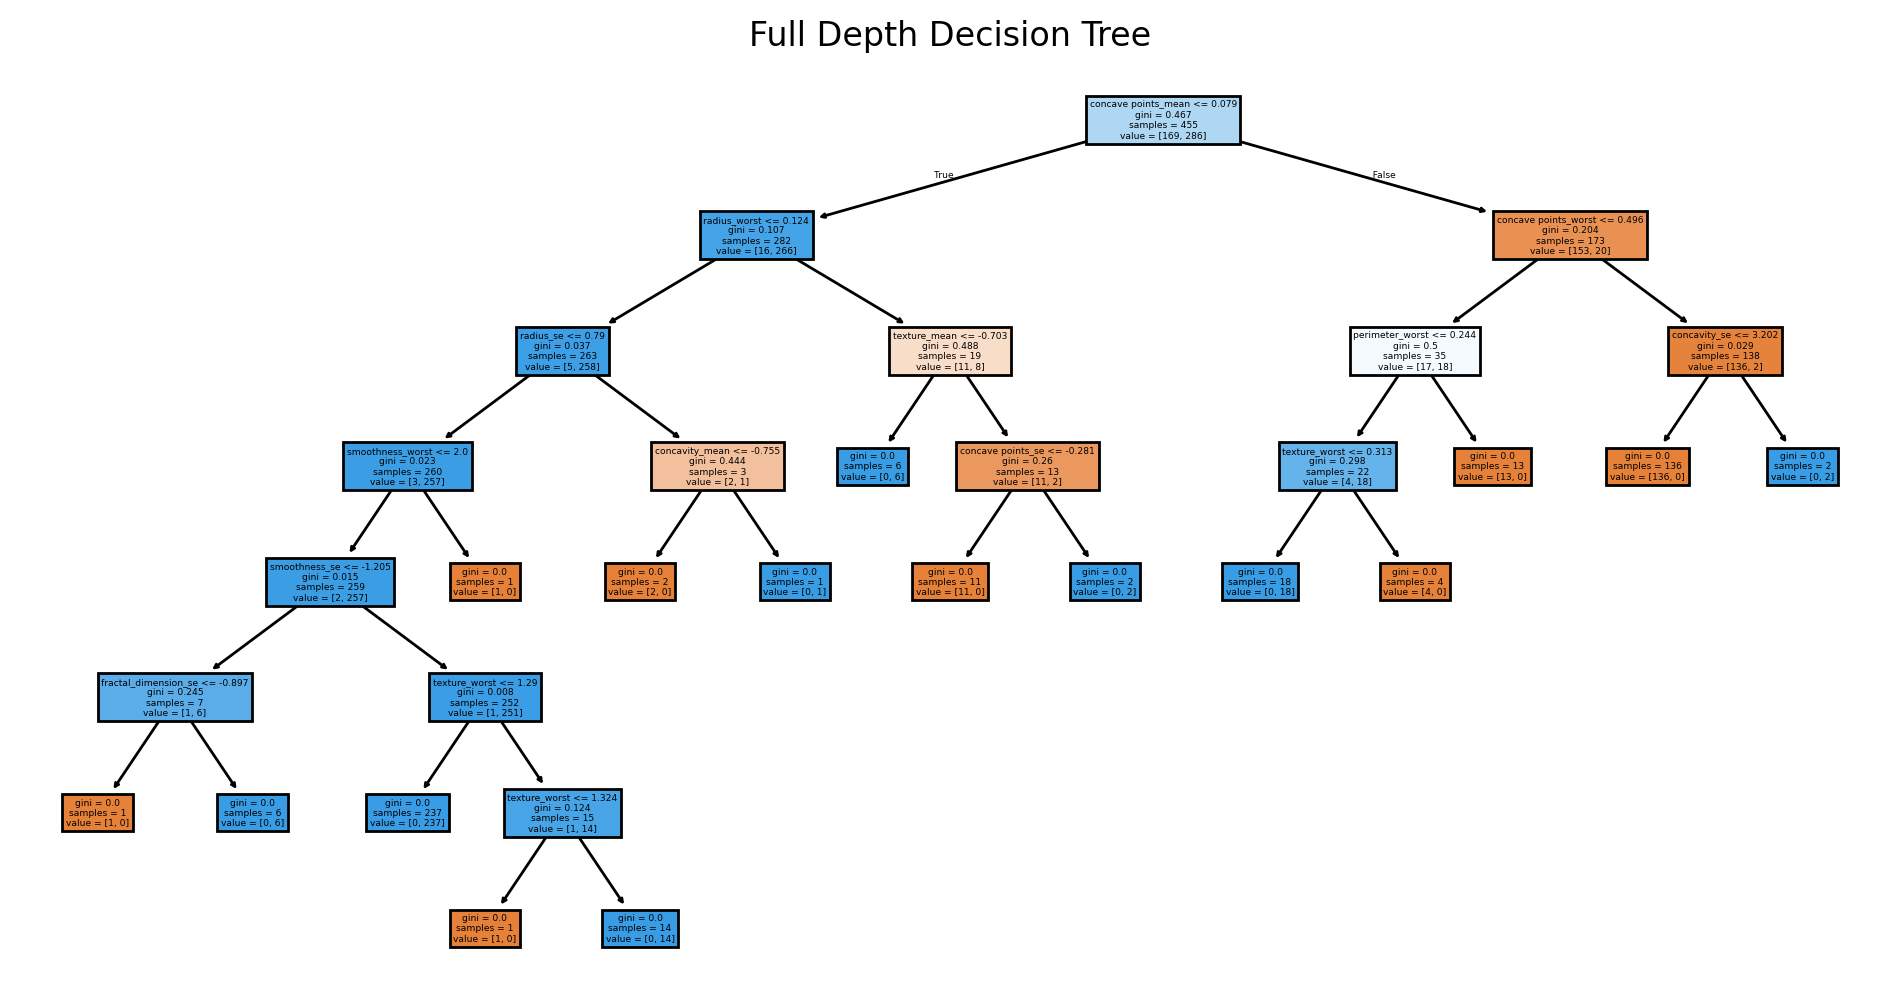

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
plot_tree(Dectree, feature_names=x.columns.tolist(), filled=True)
plt.title("Full Depth Decision Tree")
plt.show()

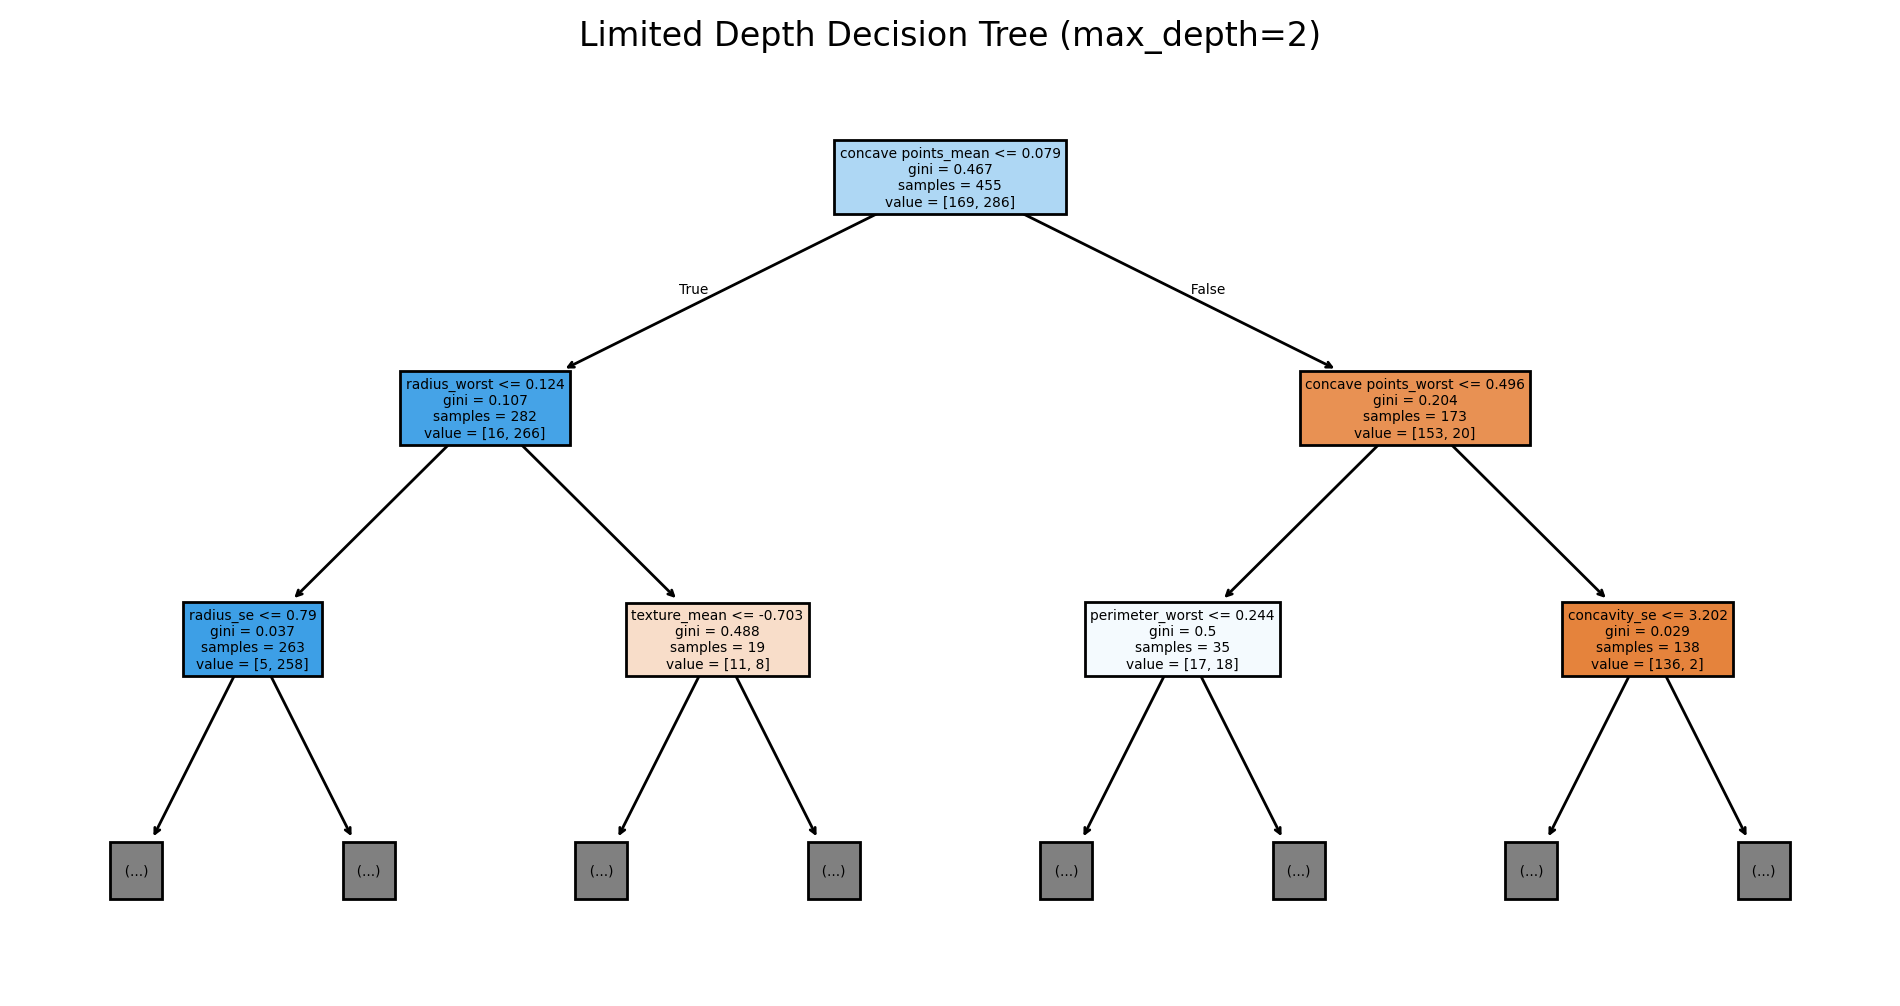

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
plot_tree(Dectree, feature_names=x.columns.tolist(), max_depth=2, filled=True)
plt.title("Full Depth Decision Tree")
plt.title("Limited Depth Decision Tree (max_depth=2)")
plt.show()

Stacking and Bagging

In [ ]:
base_models = [
    ('bernoulli', BernoulliNB()),
    ('Dectree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

In [ ]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=BernoulliNB())
stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('bernoulli', BernoulliNB()),
                               ('Dectree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=BernoulliNB())

In [ ]:
ase_model = BernoulliNB()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=BernoulliNB())
stacking_model.fit(x_train, y_train)
score = stacking_model.score(x_test, y_test)
print(f"Stacking Model Score: {score}")

base_model = BernoulliNB()
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_score = bagging_model.score(x_test, y_test)
print(f"Bagging Model Score: {bagging_score}")


Stacking Model Score: 0.9473684210526315
Bagging Model Score: 0.9824561403508771


In [ ]:
base_model = DecisionTreeClassifier()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=BernoulliNB())
stacking_model.fit(x_train, y_train)
score = stacking_model.score(x_test, y_test)
print(f"Stacking Model Score: {score}")

bagging_model = BaggingClassifier(base_model, n_estimators=100)
bagging_model.fit(x_train, y_train)
score = bagging_model.score(x_test, y_test)
print(f"Bagging Model Score: {score}")


Stacking Model Score: 0.9385964912280702
Bagging Model Score: 0.956140350877193


In [ ]:
base_model = KNeighborsClassifier()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=BernoulliNB())
stacking_model.fit(x_train, y_train)
score = stacking_model.score(x_test, y_test)
print(f"Stacking Model Score: {score}")

bagging_model = BaggingClassifier(base_model, n_estimators=100)
bagging_model.fit(x_train, y_train)
score = bagging_model.score(x_test, y_test)
print(f"Bagging Model Score: {score}")

Stacking Model Score: 0.9385964912280702
Bagging Model Score: 0.956140350877193


In [ ]:
print(x.shape)

(569, 30)


Tensor Flow


In [ ]:
model = Sequential([
    Dense(36, activation='relu', input_shape=(30,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1,  activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x, y, epochs=200, batch_size=4, verbose=2)

Epoch 1/200
143/143 - 3s - 23ms/step - accuracy: 0.7452 - loss: 0.5993
Epoch 2/200
143/143 - 0s - 3ms/step - accuracy: 0.8541 - loss: 0.4620
Epoch 3/200
143/143 - 1s - 5ms/step - accuracy: 0.9016 - loss: 0.3091
Epoch 4/200
143/143 - 0s - 3ms/step - accuracy: 0.8910 - loss: 0.3090
Epoch 5/200
143/143 - 0s - 3ms/step - accuracy: 0.8629 - loss: 0.3697
Epoch 6/200
143/143 - 0s - 3ms/step - accuracy: 0.9121 - loss: 0.3198
Epoch 7/200
143/143 - 0s - 3ms/step - accuracy: 0.9016 - loss: 0.2443
Epoch 8/200
143/143 - 0s - 3ms/step - accuracy: 0.8858 - loss: 0.2985
Epoch 9/200
143/143 - 1s - 4ms/step - accuracy: 0.8963 - loss: 0.2721
Epoch 10/200
143/143 - 0s - 3ms/step - accuracy: 0.9104 - loss: 0.2355
Epoch 11/200
143/143 - 1s - 5ms/step - accuracy: 0.8981 - loss: 0.2901
Epoch 12/200
143/143 - 0s - 3ms/step - accuracy: 0.8928 - loss: 0.2481
Epoch 13/200
143/143 - 0s - 3ms/step - accuracy: 0.9244 - loss: 0.2202
Epoch 14/200
143/143 - 1s - 4ms/step - accuracy: 0.9174 - loss: 0.2453
Epoch 15/200
1

Function to predict breast cancer tumor

In [ ]:
def df(model, scaler, input_features):

    input_data = np.array(input_features).reshape(1, -1)
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)[0]
    result = "Benign" if prediction == 0 else "Malignant"
    return prediction, result


feature_descriptions= {
    'diagnosis': "Diagnosis of the tumor. Enter 'M' for Malignant and 'B' for Benign.",
    'radius_mean': "Mean of distances from the center to points on the perimeter (e.g., 17.99).",
    'texture_mean': "Mean gray-scale intensity (e.g., 10.38).",
    'perimeter_mean': "Mean size of the perimeter of the tumor (e.g., 122.8).",
    'area_mean': "Mean area of the tumor (e.g., 1001.0).",
    'smoothness_mean': "Mean local variation in radius lengths (e.g., 0.11840).",
    'compactness_mean': "Mean perimeter^2 / area - 1.0 (e.g., 0.27760).",
    'concavity_mean': "Mean severity of concave portions of the contour (e.g., 0.30010).",
    'concave points_mean': "Mean number of concave points on the contour (e.g., 0.14710).",
    'radius_worst': "Largest mean value for the radius (e.g., 21.56).",
    'texture_worst': "Largest mean value for texture (e.g., 22.39).",
    'perimeter_worst': "Largest mean value for the perimeter (e.g., 142.0).",
    'area_worst': "Largest mean value for the area (e.g., 1479.0).",
    'smoothness_worst': "Largest mean value for smoothness (e.g., 0.11100).",
    'compactness_worst': "Largest mean value for compactness (e.g., 0.11590).",
    'concavity_worst': "Largest mean value for concavity (e.g., 0.24390).",
    'concave points_worst': "Largest mean value for concave points (e.g., 0.13890).",
    'fractal_dimension_mean': "Mean of the 'coastline approximation' - 1 (e.g., 0.00752).",
    'symmetry_mean': "Mean symmetry of the tumor (e.g., 0.19320).",
    'fractal_dimension_worst': "Largest mean value for fractal dimension (e.g., 0.07115)."
}


In [ ]:
21def predict_cancer(model, scaler, input_features):
    input_data = np.array(input_features).reshape(1, -1)
    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)[0]
    result = "Malignant" if prediction == 1 else "Benign"
    return result, prediction


feature_descriptions = {col: f"Enter the value for {col} (e.g., {x[col].mean():.2f})" for col in x.columns}

def collect_user_input():
    print("Please provide the following details for breast cancer prediction:")
    user_input = []
    for feature, description in feature_descriptions.items():
        value = float(input(f"{description}: "))
        user_input.append(value)
    return user_input


if __name__ == "__main__":
    user_features = collect_user_input()
    result, prediction_code = predict_cancer(model, scaler, user_features)
    print(f"Prediction: {result} (Code: {prediction_code})")

Please provide the following details for breast cancer prediction:
Enter the value for radius_mean (e.g., 14.13): 12
Enter the value for texture_mean (e.g., 19.29): 5
Enter the value for perimeter_mean (e.g., 91.97): 15
Enter the value for area_mean (e.g., 654.89): 569
Enter the value for smoothness_mean (e.g., 0.10): 520
Enter the value for compactness_mean (e.g., 0.10): 12.2
Enter the value for concavity_mean (e.g., 0.09): 12.1
Enter the value for concave points_mean (e.g., 0.05): 0.04
Enter the value for symmetry_mean (e.g., 0.18): 0.125
Enter the value for fractal_dimension_mean (e.g., 0.06): 0.01
Enter the value for radius_se (e.g., 0.41): 0.0
Enter the value for texture_se (e.g., 1.22): 0.02
Enter the value for perimeter_se (e.g., 2.87): 0.57
Enter the value for area_se (e.g., 40.34): 35.64
Enter the value for smoothness_se (e.g., 0.01): 0.024
Enter the value for compactness_se (e.g., 0.03): 0.03
Enter the value for concavity_se (e.g., 0.03): 0.031
Enter the value for concave poi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
metrics_comparison = {
    "Algorithm": ["K-Nearest Neighbors", "Bernoulli Naive Bayes", "Decision Tree"],
    "Accuracy": [accuracy_knn, accuracy_bernoulli, accuracy_Dectree],
    "Precision": [precision_knn, precision_bernoulli, precision_Dectree],
    "Recall": [recall_knn, recall_bernoulli, recall_Dectree],
    "F1-Score": [f1_knn, f1_bernoulli, f1_Dectree],
    "ROC-AUC": [roc_auc_knn, roc_auc_bernoulli, roc_auc_Dectree]
}


metrics_df = pd.DataFrame(metrics_comparison)

print("Algorithm Performance Comparison:")
print(metrics_df)

Algorithm Performance Comparison:
               Algorithm  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    K-Nearest Neighbors  0.947368   0.957746  0.957746  0.957746  0.943990
1  Bernoulli Naive Bayes  0.982456   0.985915  0.985915  0.985915  0.999345
2          Decision Tree  0.929825   0.943662  0.943662  0.943662  0.925319


In [ ]:
!jupyter nbconvert --to html 22085492AkritiWagle.ipynb

[NbConvertApp] WARNING | pattern '22085492AkritiWagle.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe